# Electrical Fault detection

We have to predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [1]:
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read csv file using pandas
data = pd.read_csv('/content/detect_dataset.csv')

In [3]:
data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


# basic EDA

In [4]:
#check shape of the dataset
data.shape

(12001, 9)

In [5]:
# check columns of dataset
data.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [6]:
# check length of dataset
data.shape[0]

12001

In [7]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [8]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
data.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [9]:
# Check for missing values in all the columnns of the dataset
data.isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [10]:
# loop through datatset to find count of unique values of each column
data.nunique()

Output (S)        2
Ia            12001
Ib            12001
Ic            12001
Va            11996
Vb            11813
Vc            11987
Unnamed: 7        0
Unnamed: 8        0
dtype: int64

In [11]:
# drop 'Unnamed: 7','Unnamed: 8'
data.drop(['Unnamed: 7','Unnamed: 8'],axis = 1,inplace = True)

In [12]:
data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [13]:
# check total number of fault and no-fault instances
data['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

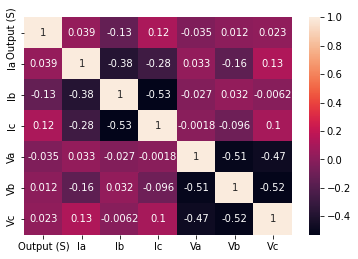

In [14]:
# Using pandas
sns.heatmap(data.corr(),annot = True)

# Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

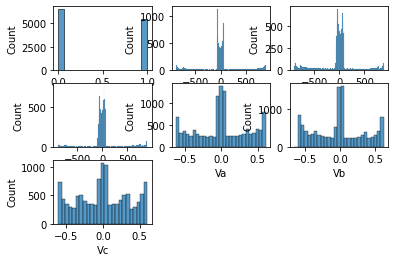

In [15]:
# Histogram using pandas 
for i in range(len(data.columns)):
  plt.subplot(3,3,i+1)
  sns.histplot(data[data.columns[i]])

### Count plot

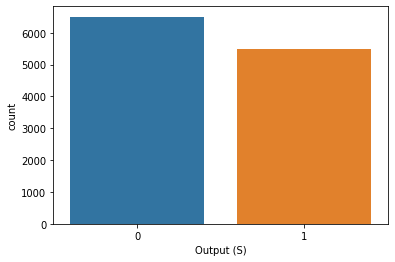

In [16]:
# count plot of Output (S) column
sns.countplot(x = 'Output (S)',data = data)

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

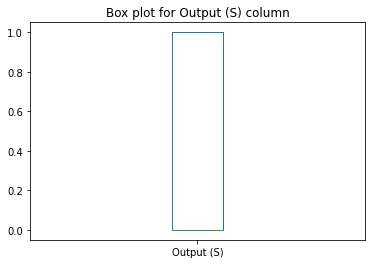

In [17]:
# box plot using pandas 
# box plot for Output (S) column 
data['Output (S)'].plot.box(title = 'Box plot for Output (S) column')

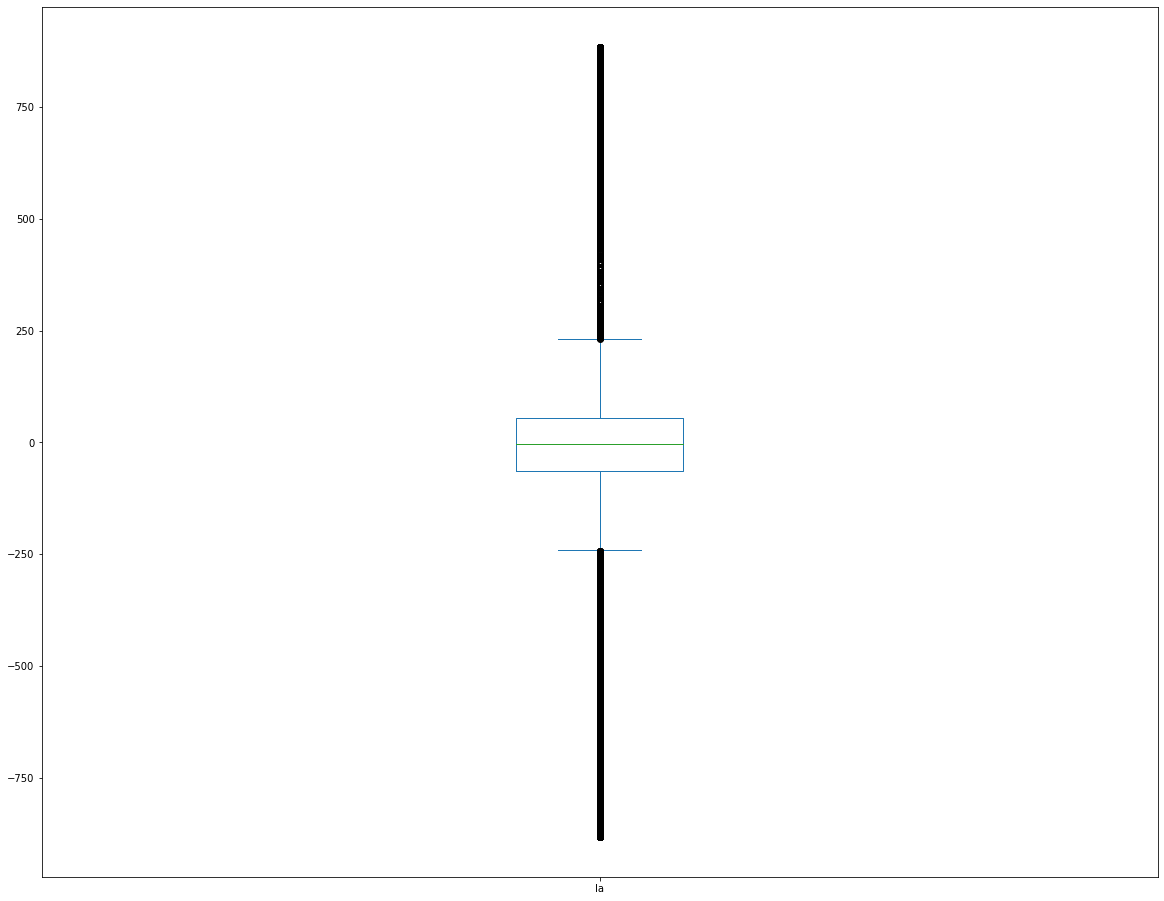

In [18]:
# box plot using pandas 
# box plot for Ia column 
plt.figure(figsize = (20,16))
data['Ia'].plot.box()

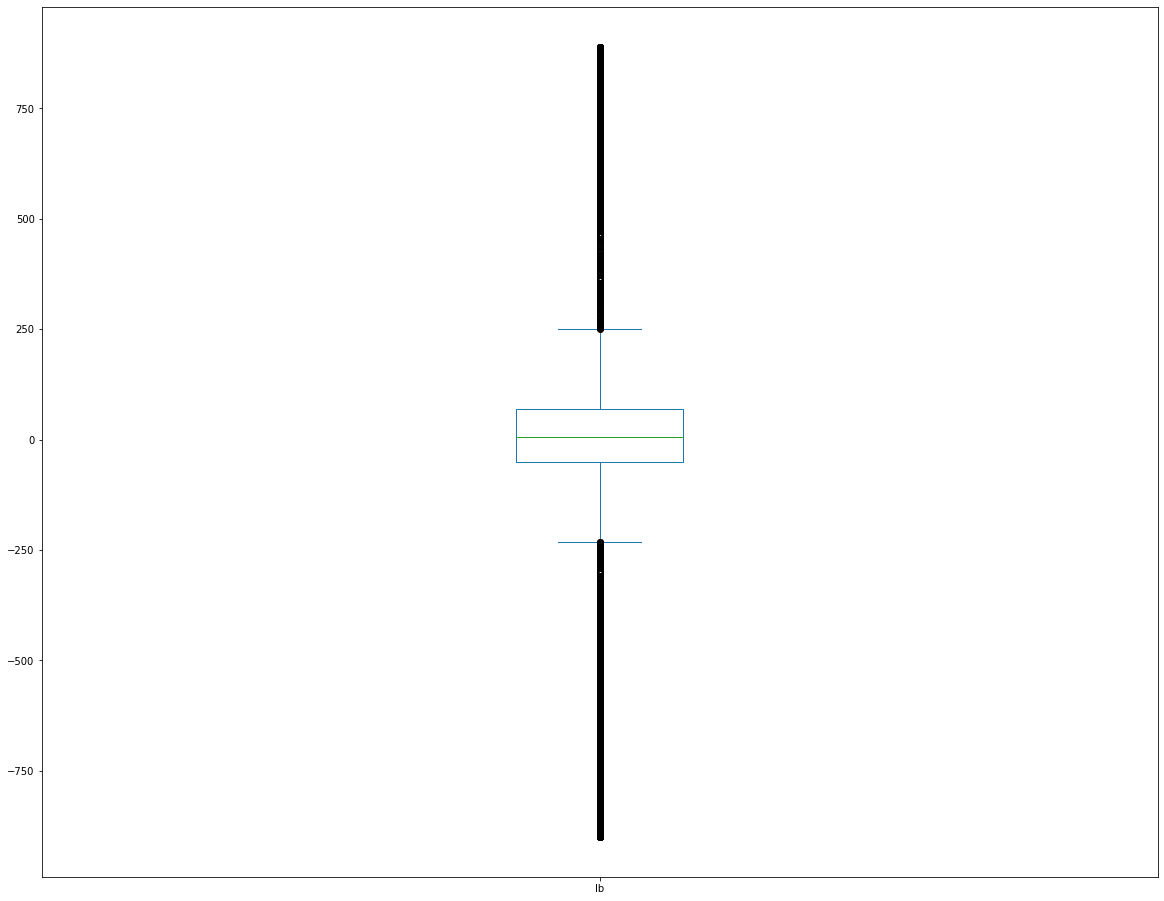

In [19]:
# box plot using pandas 
# box plot for Ib column 
plt.figure(figsize = (20,16))
data['Ib'].plot.box()

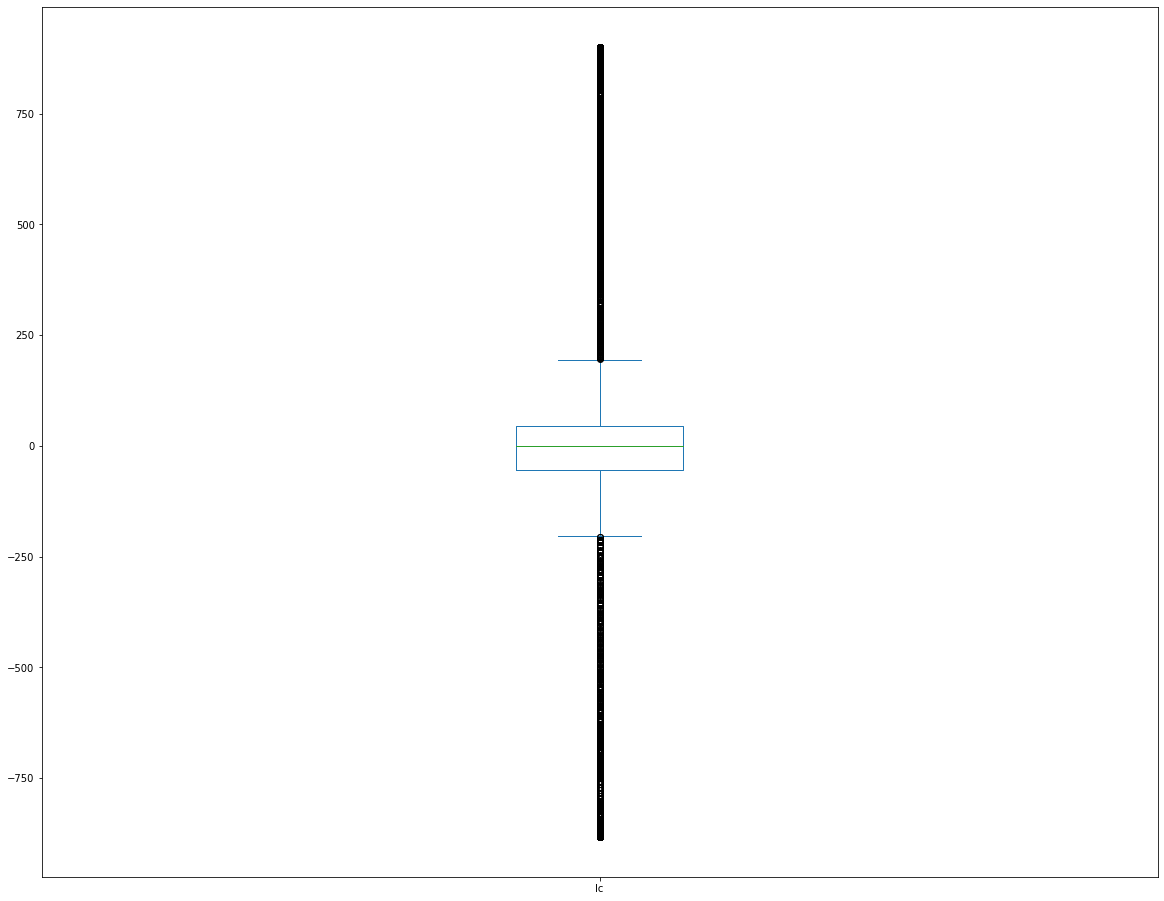

In [20]:
# box plot using pandas 
# box plot for Ic column 
plt.figure(figsize = (20,16))
data['Ic'].plot.box()

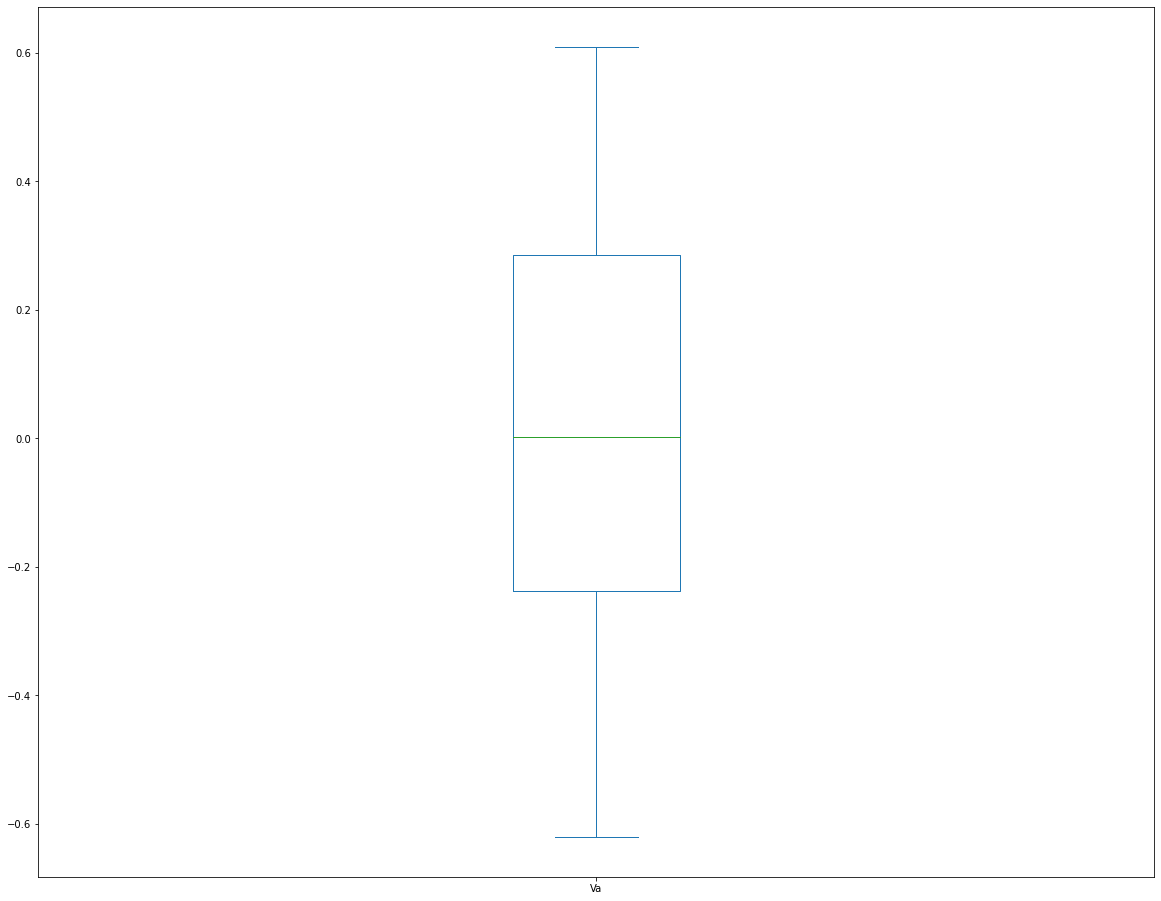

In [21]:
# box plot using pandas 
# box plot for Va column 
plt.figure(figsize = (20,16))
data['Va'].plot.box()

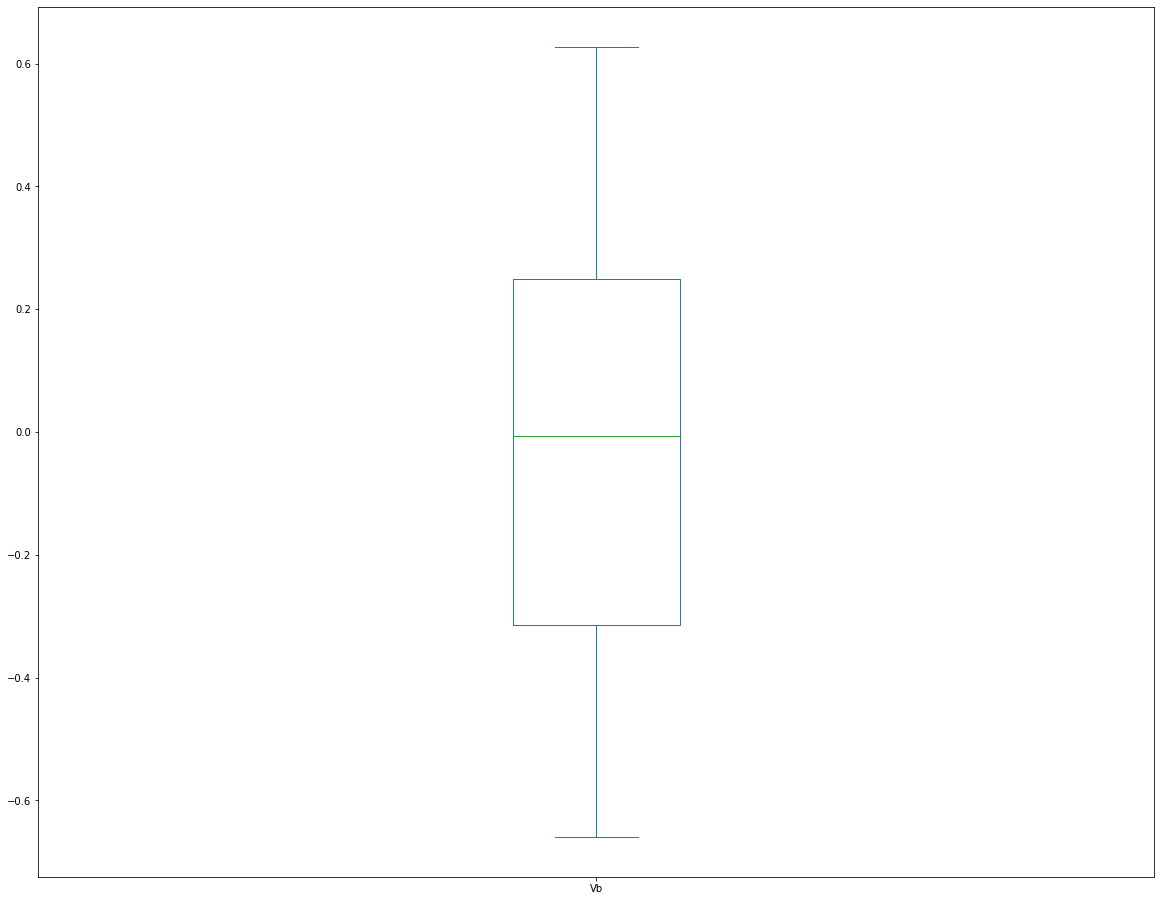

In [22]:
# box plot using pandas 
# box plot for Vb column 
plt.figure(figsize = (20,16))
data['Vb'].plot.box()

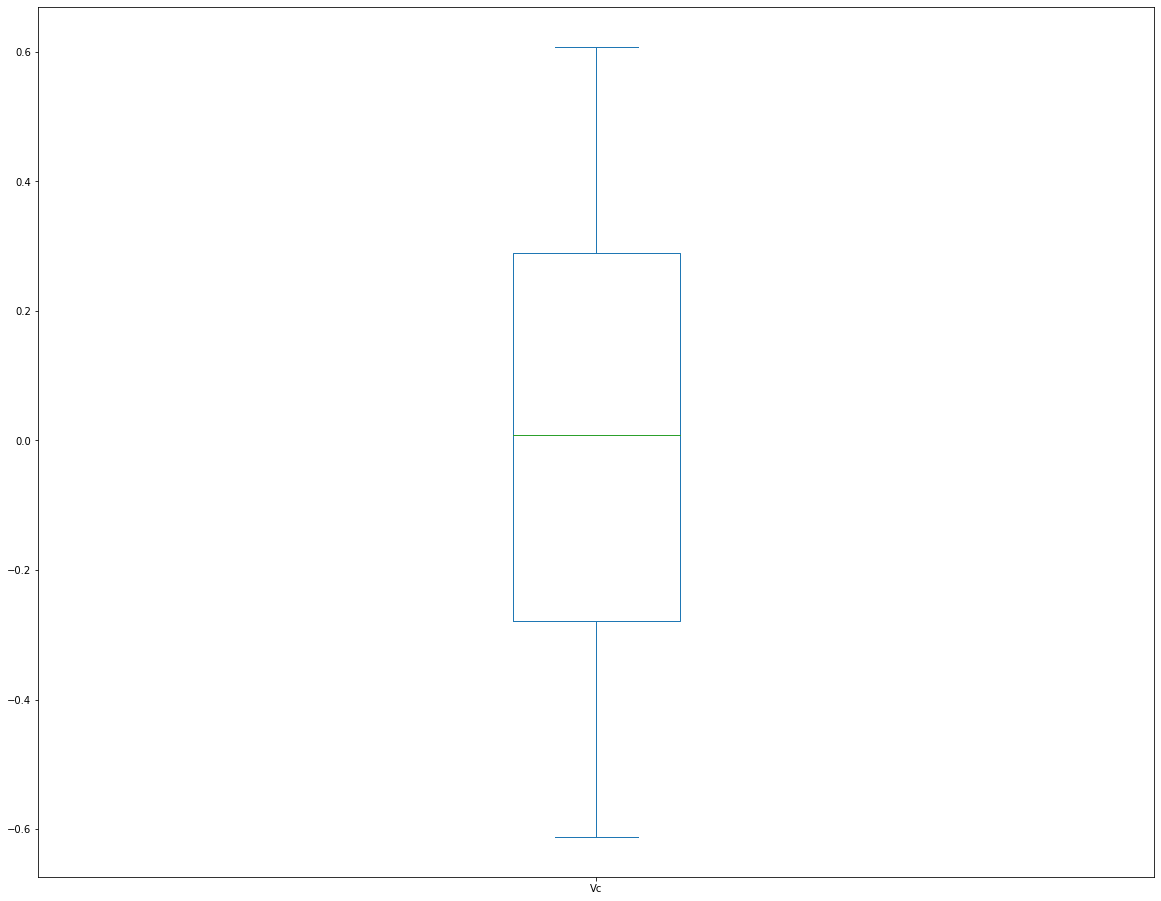

In [23]:
# box plot using pandas 
# box plot for Vc column 
plt.figure(figsize = (20,16))
data['Vc'].plot.box()

Dataset is balanced and not skewed in nature

# Dendrogram

In [24]:
data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


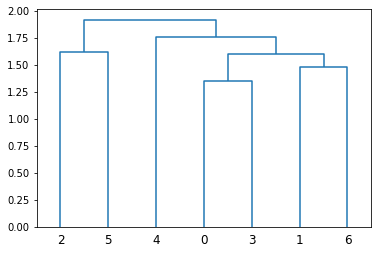

In [25]:
# Plot a Dendrogram on the columns of the dataset
# droping the NaN values
from scipy.cluster import hierarchy
correlation_matrix = data.corr(method = 'pearson')
dendrogram = hierarchy.dendrogram(hierarchy.linkage(correlation_matrix,method = 'average'),)
plt.show()

# Preprocessing, Modeling and prediction on test data

In [26]:
## Split the labels and the target
x = data.drop('Output (S)',axis = 1)
y = data['Output (S)']
#check the shape 
print('THe shape of Features matrix/Data Frame is ',x.shape)
print('The shape of the Target dataframe is ',y.shape)

THe shape of Features matrix/Data Frame is  (12001, 6)
The shape of the Target dataframe is  (12001,)


In [27]:
# import train test split
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing set (20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
# check shape of X_train and y_train
print('The size of training set is ',x_train.shape,y_train.shape)
# check shape of X_test and y_test
print('The size of testing set is ',x_test.shape,y_test.shape)

The size of training set is  (9600, 6) (9600,)
The size of testing set is  (2401, 6) (2401,)


In [28]:
x_train

,Ia,Ib,Ic,Va,Vb,Vc
4348,-66.328268,58.826793,10.196755,-0.336024,-0.271272,0.607296
4240,22.642934,43.468025,-63.387542,-0.467717,0.573506,-0.105789
5475,-10.101778,-644.905388,657.300406,-0.402039,-0.020743,0.422782
2847,-98.429933,811.598437,54.324391,0.035060,-0.200225,0.165165
1779,60.570473,-24.541375,-38.215608,0.053363,0.495283,-0.548647
...,...,...,...,...,...,...
9543,872.482682,-412.709525,-10.962331,0.021500,-0.292238,0.270738
6014,-55.513301,9.174614,48.635366,0.260791,-0.595314,0.334523
2695,668.341377,-847.788207,-26.129972,-0.008864,-0.072605,0.081469
6570,-703.012103,-74.688963,779.878194,-0.017158,0.029459,-0.012301


In [29]:
cols_train = x_train.columns
cols_test = x_test.columns

### Scaling

In [30]:
# import min max scalar
from sklearn.preprocessing import MinMaxScaler

# Instantiate t
minmax = MinMaxScaler()

# fit on train data
x_train = minmax.fit_transform(x_train)


# fit on test data
x_test = minmax.fit_transform(x_test)

In [31]:
x_train = pd.DataFrame(x_train,columns = cols_train)
x_test = pd.DataFrame(x_test,columns = cols_test)

In [32]:
x_train.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,0.461891,0.535833,0.500694,0.231377,0.301814,0.999225
1,0.512177,0.527255,0.459462,0.124358,0.957845,0.415185
2,0.493670,0.142774,0.863292,0.177731,0.496368,0.848101
3,0.443747,0.956283,0.525420,0.532932,0.356987,0.637105
4,0.533614,0.489269,0.473567,0.547807,0.897099,0.052469


In [33]:
x_test.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,0.213443,0.286607,0.995567,0.477591,0.510625,0.509379
1,0.503157,0.530166,0.461929,0.044035,0.874947,0.577294
2,0.019637,0.481098,0.487035,0.471798,0.773301,0.249314
3,0.951718,0.462717,0.088023,0.531538,0.460273,0.506011
4,0.401315,0.133966,0.462756,0.470871,0.725714,0.298419


In [34]:
# Visualize importance of all the features in the dataset for the prediction
def visualize_importance(feature_importances,dataset):
  # creating dataframe for feature name and feature importance
  feature_importance_df = pd.DataFrame()
  feature_importance_df['Feature_importances'] = feature_importances
  feature_importance_df['Features'] = dataset.columns
  
  # grouping all data and sorting in descending order
  feature_importance_df = feature_importance_df.sort_values(by = ['Feature_importances'],ascending = False)

  # ploting feature importance data using boxenplot
  plot = sns.boxenplot(x = 'Feature_importances',y = 'Features',data = feature_importance_df)

  #Return the plot
  return plot

In [35]:
# import accuracy_score, precision_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

## LogisticRegression

The accuracy score is  0.6930445647646813
The Precision score is  1.0
The Recall score is  0.3602430555555556
The Confusion matrix is
  [[1249    0]
 [ 737  415]]


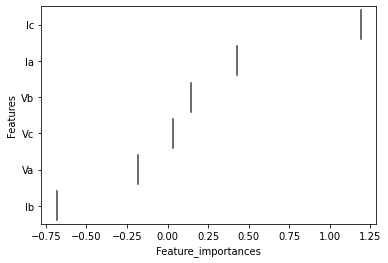

CPU times: user 360 ms, sys: 208 ms, total: 568 ms
Wall time: 464 ms


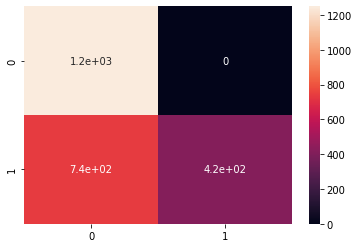

In [36]:
%%time
# Fit a logistic Regression model to the train dataset
# Import logisticRegressor
from sklearn.linear_model import LogisticRegression

# Instantiate the model
log_model = LogisticRegression()

# fitting the model on train data
log_model.fit(x_train,y_train)

#predict on test data
y_pred = log_model.predict(x_test)

# print accuracy_score,precision_score,recall_score,confusion_matrix
print('The accuracy score is ',accuracy_score(y_test,y_pred))
print('The Precision score is ',precision_score(y_test,y_pred))
print('The Recall score is ',recall_score(y_test,y_pred))
confusion = confusion_matrix(y_test,y_pred)
print('The Confusion matrix is\n ',confusion)

# visualizing importance of features
plot = visualize_importance(log_model.coef_[0],x_train)
plt.show(plot)

# display confusion matrix
sns.heatmap(confusion,annot = True)

## RandomForestClassifier

The Accuracy score is  0.9900041649312786
The Precision score is  0.9947368421052631
The Recall score is  0.984375
The Confusion matrix is
 [[1243    6]
 [  18 1134]]


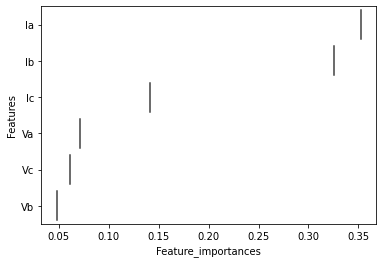

CPU times: user 1.68 s, sys: 69.3 ms, total: 1.75 s
Wall time: 1.89 s


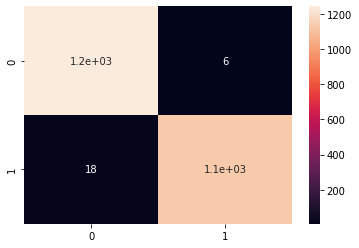

In [37]:
%%time
# Fit a RandomForestClassifier model to the train dataset
#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier()

# fitting the model on train data
rf.fit(x_train,y_train)

# predict on test data
y_pred = rf.predict(x_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print('The Accuracy score is ',accuracy_score(y_test,y_pred))
print('The Precision score is ',precision_score(y_test,y_pred))
print('The Recall score is ',recall_score(y_test,y_pred))
confusion = confusion_matrix(y_test,y_pred)
print('The Confusion matrix is\n',confusion)

# visualizing importance of features
plot = visualize_importance(rf.feature_importances_,x_train)
plt.show()
# display confusion matrix
sns.heatmap(confusion,annot = True)

## DecisionTreeClassifier

The Accuracy score is  0.9887546855476884
The Precision score is  0.9938542581211589
The Recall score is  0.9826388888888888
The Confusion matrix is  [[1242    7]
 [  20 1132]]


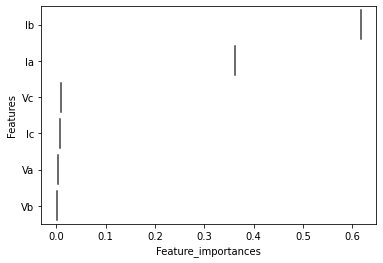

CPU times: user 269 ms, sys: 50.5 ms, total: 319 ms
Wall time: 281 ms


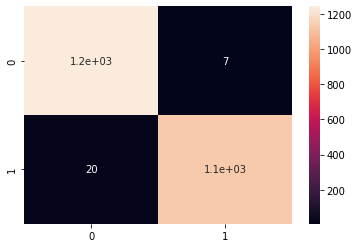

In [38]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dtree = DecisionTreeClassifier()

# fitting the model on train data
dtree.fit(x_train,y_train)

# predict on test data
y_pred = dtree.predict(x_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print('The Accuracy score is ',accuracy_score(y_test,y_pred))
print('The Precision score is ',precision_score(y_test,y_pred))
print('The Recall score is ',recall_score(y_test,y_pred))
confusion = confusion_matrix(y_test,y_pred)
print('The Confusion matrix is ',confusion)

# visualizing importance of features
plot = visualize_importance(dtree.feature_importances_,x_train)
plt.show()

# display confusion matrix
sns.heatmap(confusion,annot = True)

## GradientBoostingClassifier

The Accuracy score is  0.9879216992919617
The Precision score is  0.9964633068081344
The Recall score is  0.9782986111111112
The Confusion matrix is  [[1245    4]
 [  25 1127]]


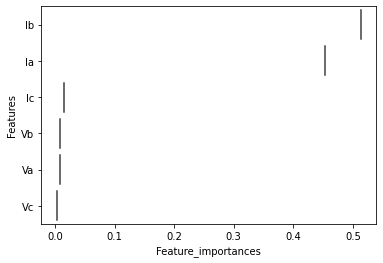

CPU times: user 2.46 s, sys: 55.3 ms, total: 2.51 s
Wall time: 2.48 s


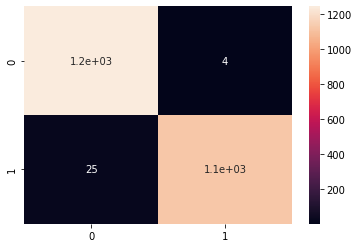

In [39]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gb_model = GradientBoostingClassifier()

# fitting the model on train data
gb_model.fit(x_train,y_train)

# predict on test data
y_pred = gb_model.predict(x_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
print('The Accuracy score is ',accuracy_score(y_test,y_pred))
print('The Precision score is ',precision_score(y_test,y_pred))
print('The Recall score is ',recall_score(y_test,y_pred))
confusion = confusion_matrix(y_test,y_pred)
print('The Confusion matrix is ',confusion)

# visualizing importance of features
plot = visualize_importance(gb_model.feature_importances_,x_train)
plt.show()

# display confusion matrix
sns.heatmap(confusion,annot = True)

## Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [47]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

def RandomSearch(model,params):
  # Random search of parameters, using 3 fold cross validation, 
  kcross = 3
  # search across 100 different combinations, and use all available cores
  randomized_search = RandomizedSearchCV(estimator = model,param_distributions = params,n_iter=10,cv = kcross)

  # Fit the random search model
  randomized_search.fit(x_train,y_train)
  return randomized_search.best_params_

In [52]:
%%time
# for random forest classifier
# create parameters dict for tunning
rf = RandomForestClassifier()
params = {
    'n_estimators':[10,20,30,50,100],
    'max_depth':np.linspace(1,32,32,endpoint = True),
    'max_features':['auto']
}
# passing data for hyper parameter tunning with Randomized search cv

best_params = RandomSearch(rf,params)

CPU times: user 13.1 s, sys: 0 ns, total: 13.1 s
Wall time: 13.2 s


In [53]:
best_params

{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 25.0}

### working with best model

In [55]:
# print Area under ROC of Model On Test Set
# Importing the roc_auc_score library from the metrics package
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier(**best_params)
rf.fit(x_train,y_train)

#Predicting the Probability of the test data
y_prob = rf.predict_proba(x_test)
y_prob = y_prob[:,1]

#Area under the curve
auc = roc_auc_score(y_test,y_prob)
print('Area under ROC of model on test set - ',auc*100)

Area under ROC of model on test set -  99.97755148563294


In [56]:
# Create a dataframe with predicted result as data using best model
y_pred = rf.predict(x_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted Data'])

In [57]:
y_pred.head()

,Predicted Data
0,1
1,0
2,1
3,1
4,1


# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well.  We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.